Nature is quantum mechanical, and the language we use to describe quantum mechanics is linear algebra. In this chapter, we will explore the basics of quantum information by building a quantum simulator, built entirely on simple linear algebra.

We will use very small examples, so that our simulator can perform all calculations exactly. Using the best computers in the world, we can simulate up to about 50 qubits.

# Dirac notation
Qubits are represented by statevectors. We use **dirac notation** **(bra-ket notation)** to tidy up notation.
\
The $\vert \cdot \rangle$ is called a ket and represents a column vector.

\begin{equation}
\vert 0 \rangle = \begin{pmatrix}
  1 \\
  0 \\
\end{pmatrix}, \vert 1 \rangle = \begin{pmatrix}
  0 \\
  1 \\
\end{pmatrix}
\end{equation}

The $\langle \cdot \vert $ is called a bra. It is a row vector.

\begin{equation}
\vert 0 \rangle = \begin{pmatrix}1 \ 0 \end{pmatrix},
\vert 1 \rangle = \begin{pmatrix}  0 \ 1 \end{pmatrix}
\end{equation}

The **bra** is the **conjugate transpose** (Hermitian conjugate) of the corresponding **ket**:  
\begin{equation}
\vert \psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \quad \Rightarrow \quad \langle \psi | = \begin{bmatrix} \alpha^* & \beta^* \end{bmatrix}.
\end{equation}
The * represents the [complex conjugate](https://en.wikipedia.org/wiki/Complex_conjugate).
This compact notation makes it easy to describe and manipulate quantum states mathematically!

In [10]:
import numpy as np
#In Python, we can define vectors using numpy arrays
ket_0 = np.array([1,0])
ket_1 = np.array([0,1])

# Superposition
A classical bit can only exist in a 0 or 1 state, but a qubit can exist in a linear combination of the basis states $\vert 0 \rangle$ or $\vert 1 \rangle$ (among others). This property is called **superposition**.

\begin{equation}
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle
\end{equation}
with $\alpha$, $\beta$ $ \in \mathbb{C}$ and $\alpha^* \alpha + \beta^* \beta = 1$. The * represents the [complex conjugate](https://en.wikipedia.org/wiki/Complex_conjugate).

Despite qubits being in a linear combination of states, when measuring the qubit, for example at the end of an algorithm, it will only ever be measured in $\vert 0 \rangle$ or $\vert 1 \rangle$.

In [11]:
# Define amplitude coefficients
# Make sure that alpha^*alpha + beta^* beta = 1
alpha = 1/2.0
beta = np.sqrt(3)/2* 1j

#Define your superposition state (linear combination)
psi = alpha*ket_0 + beta*ket_1
print(psi)
print(np.conj(psi))

[0.5+0.j        0. +0.8660254j]
[0.5-0.j        0. -0.8660254j]


To visualize this, we use the **Bloch sphere**, a geometric representation of a qubit's state. Any pure state can be represented as a point on the surface of the sphere, defined by two angles:

$\theta$ : Specifies the angle between the state and the $\vert{0} \rangle$ axis (north pole)

$\phi$ : Specifies the rotation around the z-axis. 

For example, $\vert 0 \rangle$ is the north pole ($\theta = 0$) while $\vert 1\rangle$ is the south pole ($\theta = \pi$). 

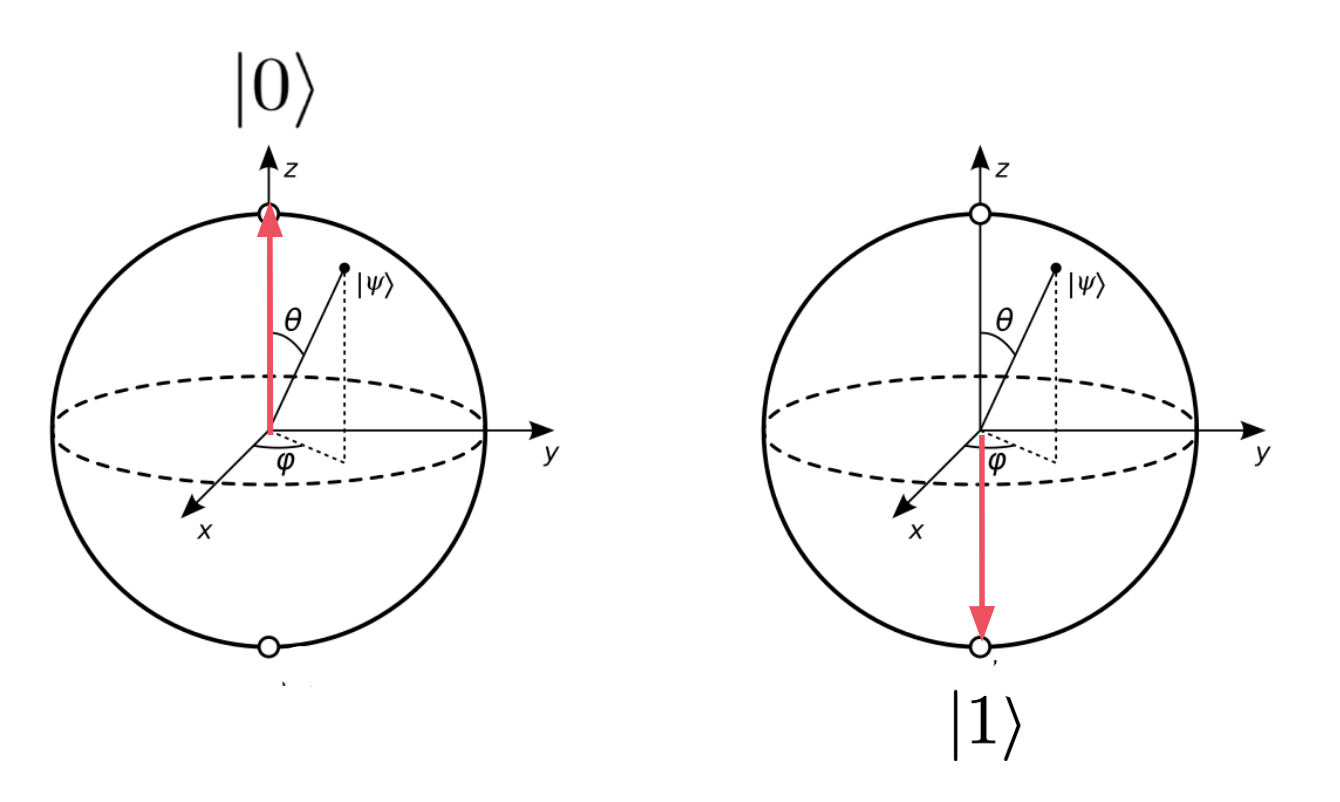

A general superposition lies somewhere on the sphere's surface. For example,
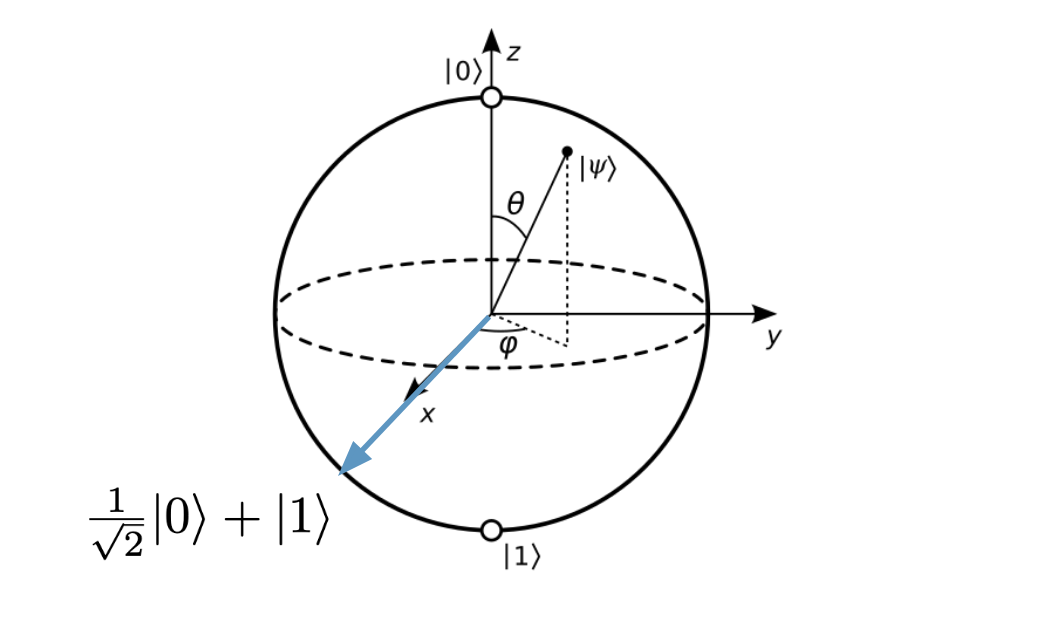

# Operations on qubit

Ok we have qubits, they can be in superpositions of $\vert 0 \rangle$ and $\vert 1 \rangle$ and we can visualize them on the Bloch sphere. What exactly can we do to with them? We can apply **operations** on them. These are matrices that modify the state of the qubit, in other words, they move the qubit across the Bloch sphere. Let's try it. 

We will start with the most simple qubit state, state $\vert \psi \rangle = \vert 0 \rangle$. As is, this is not a superposition state. It initially points up on the Bloch sphere. 
What happens if we apply the following matrix to our qubit state? 

\begin{equation}
H = \frac{1}{\sqrt{2}}\begin{pmatrix} 
1 & -1\\
1 & 1
\end{pmatrix}
\end{equation}

EXERCICE

---

Apply the H matrix to a qubit in state $\vert \psi \rangle = \vert 0 \rangle$. You can use  [`np.dot()`](https://numpy.org/doc/2.1/reference/generated/numpy.dot.html) to perform the dot product between two arrays.

In [12]:
#Define state 0
ket_0 = np.array([1,0])

#Define the matrix H
H = 1/np.sqrt(2)*np.array([[1,-1], [1,1]])

#Apply the operation to the qubit
new_ket = np.dot(H, ket_0)
print(new_ket)

[0.70710678 0.70710678]


To print the new statevector in Dirac notation, use the helper function `print_state_vector()` as below. 

In [13]:
from print_latex import print_state_vector

print_state_vector(new_ket)

$$\left|\psi\right\rangle = (0.707107) \left|{0}\right\rangle + (0.707107) \left|{1}\right\rangle$$

\begin{equation}
H \vert 0 \rangle  = \frac{1}{\sqrt{2}}\begin{pmatrix} 
1 & -1\\
1 & 1
\end{pmatrix}\begin{pmatrix} 0 \\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\1\end{pmatrix}  = \frac{1}{\sqrt{2}}(\vert 0 \rangle + \vert 1 \rangle)
\end{equation}
ADD IMAGE BLOCH SPHERE OR QTIP

We have created a superposition state by applying a carefully selected matrix to our initial qubit state. This is a special matrix in quantum computing called a **Hadamard gate**. We will discuss it more in the next chapter. 

Applying matrices to vectors might seem abstract but this is something we can do quite precisely by sending pulses to qubits. This all happens in the background, so when using a quantum computer like MonarQ, we are abstracted away from pulses. 

# Probability amplitudes

Consider the general superposition,
\begin{equation}
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle.
\end{equation}

Upon measurement, we will measure the qubit as being in state $\vert 0 \rangle$ with probability $\alpha^* \alpha$ and in $\vert 1 \rangle$ with probability $\beta^* \beta$. This is a postulate of quantum mechanics! We will use the modulus squared notation $\vert \cdot \vert ^2 $ to denote the probability amplitudes.

\begin{equation}
P(\vert 0 \rangle) = \vert \alpha \vert ^2 = \alpha^* \alpha 
\end{equation}
\begin{equation}
P(\vert 1 \rangle) = \vert \beta \vert ^2 = \beta^* \beta
\end{equation}


EXERCICE

---

Consider the superposition state from the last exercice

\begin{equation}
\vert \psi \rangle = \frac{1}{\sqrt{2}}\vert 0 \rangle + \frac{1}{\sqrt{2}} \vert 1 \rangle.
\end{equation}

Compute the probability $P_0$ of measuring $\vert{0}\rangle$ and the probability $P_1$ of measuring $\vert{1}\rangle$.

In [34]:
#Compute the probability P0 of measuring \ket(0)
P0 = np.conj(new_ket[0])*(new_ket[0])
#Compute the probability P1 of measuring \ket(1) 
P1 = np.conj(new_ket[1])*(new_ket[1])

print(P0, P1)

probs = np.conj(new_ket)*new_ket

0.4999999999999999 0.4999999999999999


So we will measure $\vert 0 \rangle$ 50% of the time and $\vert 1 \rangle$ the other 50% of the time. Quantum computation is probabilistic.

Surprisingly, this is all you need to build a basic quantum simulator. 

EXERCICE

---

Use [np.random.choice()](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.choice.html) to simulate the results of 1000 measurements by sampling from the probability distribution you found above.


In [43]:
res = np.random.choice([0, 1], p = probs, size = 1000)
np.unique(res, return_counts = True)

(array([0, 1]), array([489, 511]))

This was a very simple example, especially because we did everything with **one** qubit. Multi-qubit systems are more complicated. In particular, they can be **entangled** with each other. We will study multi-qubit systems in the next chapter with quantum circuits. 

As a final exercice, we will build a one qubit quantum simulator by hand. You have all the building blocks above.



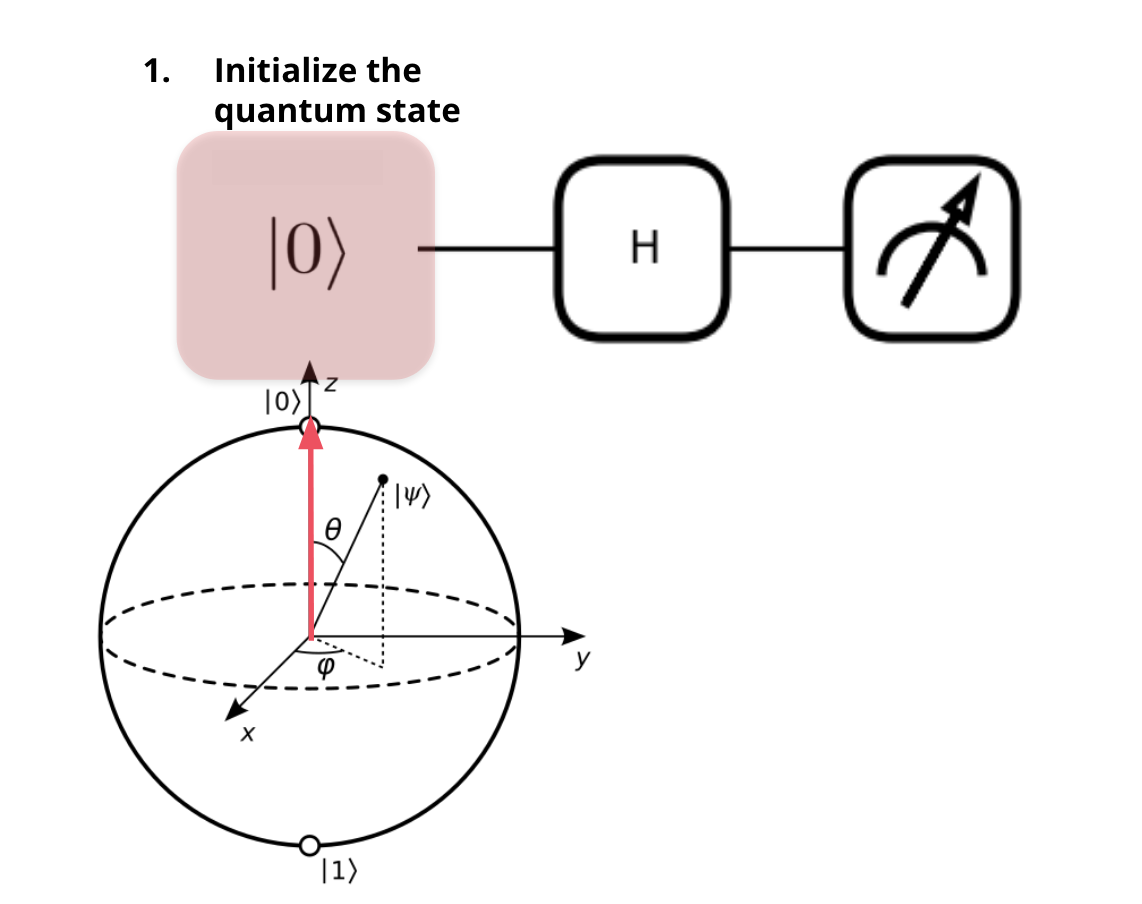

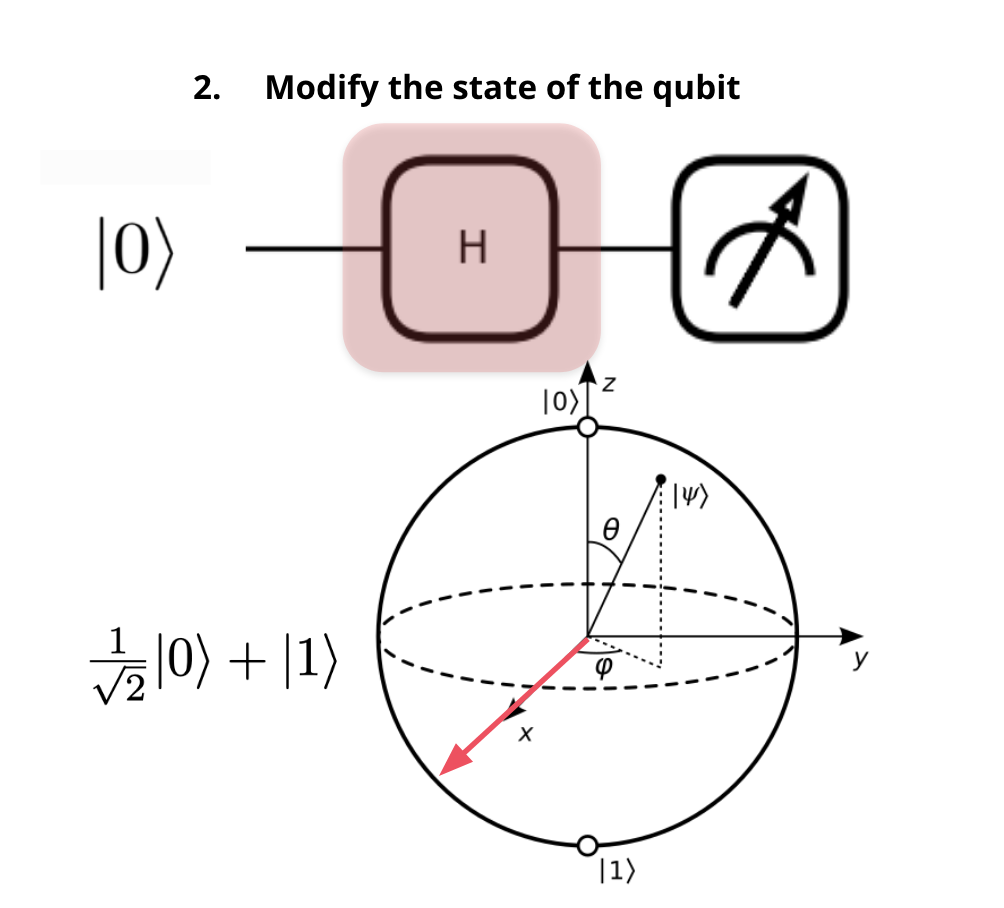

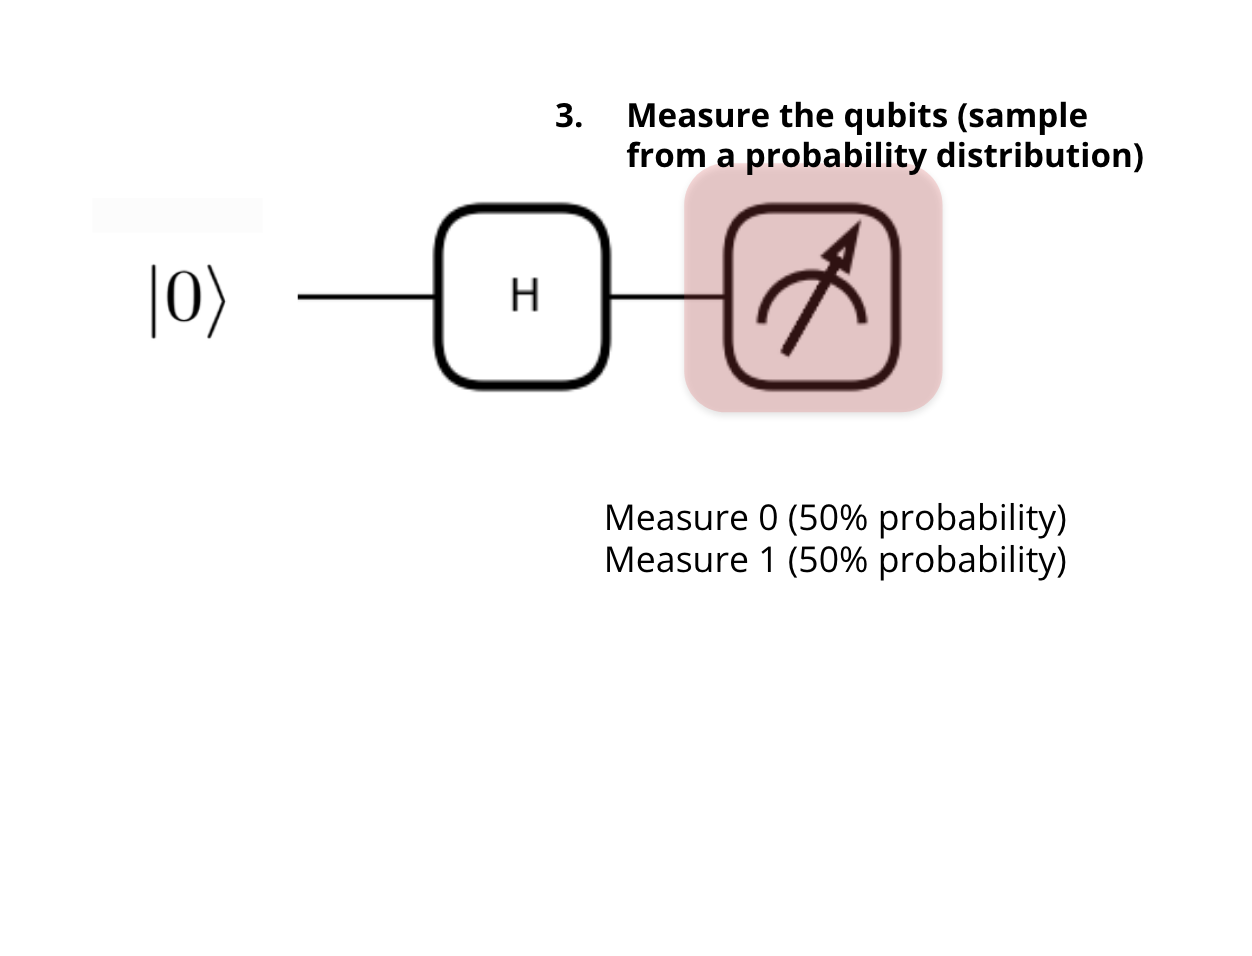

In [ ]:
def quantum_simulator(n_shots):

    #Initialize a qubit to either |0> or |1>


    #Modify the state of the qubit with the matrix H 


    #Perform a measurement by sampling from the probability distribution 


    #Repeat n_shots times and return a dictionnary


    